ARTI308 - Machine Learning

# Lab 3: Exploratory Data Analysis (EDA)

EDA is the first and most important step in any Machine Learning project.
Before building models, we must understand:

- What does the data represent?
- Are there missing values?
- Are there outliers?
- What patterns exist?
- Which variables influence others?

If we do not understand the data, we cannot build a good model.

### Why EDA is Important

In real-world machine learning projects:

    1- 70–80% of the time is spent on understanding and cleaning data
    2- Only 20–30% is spent building models

**EDA helps us:**

- Detect errors
- Identify trends
- Discover relationships
- Make business decisions

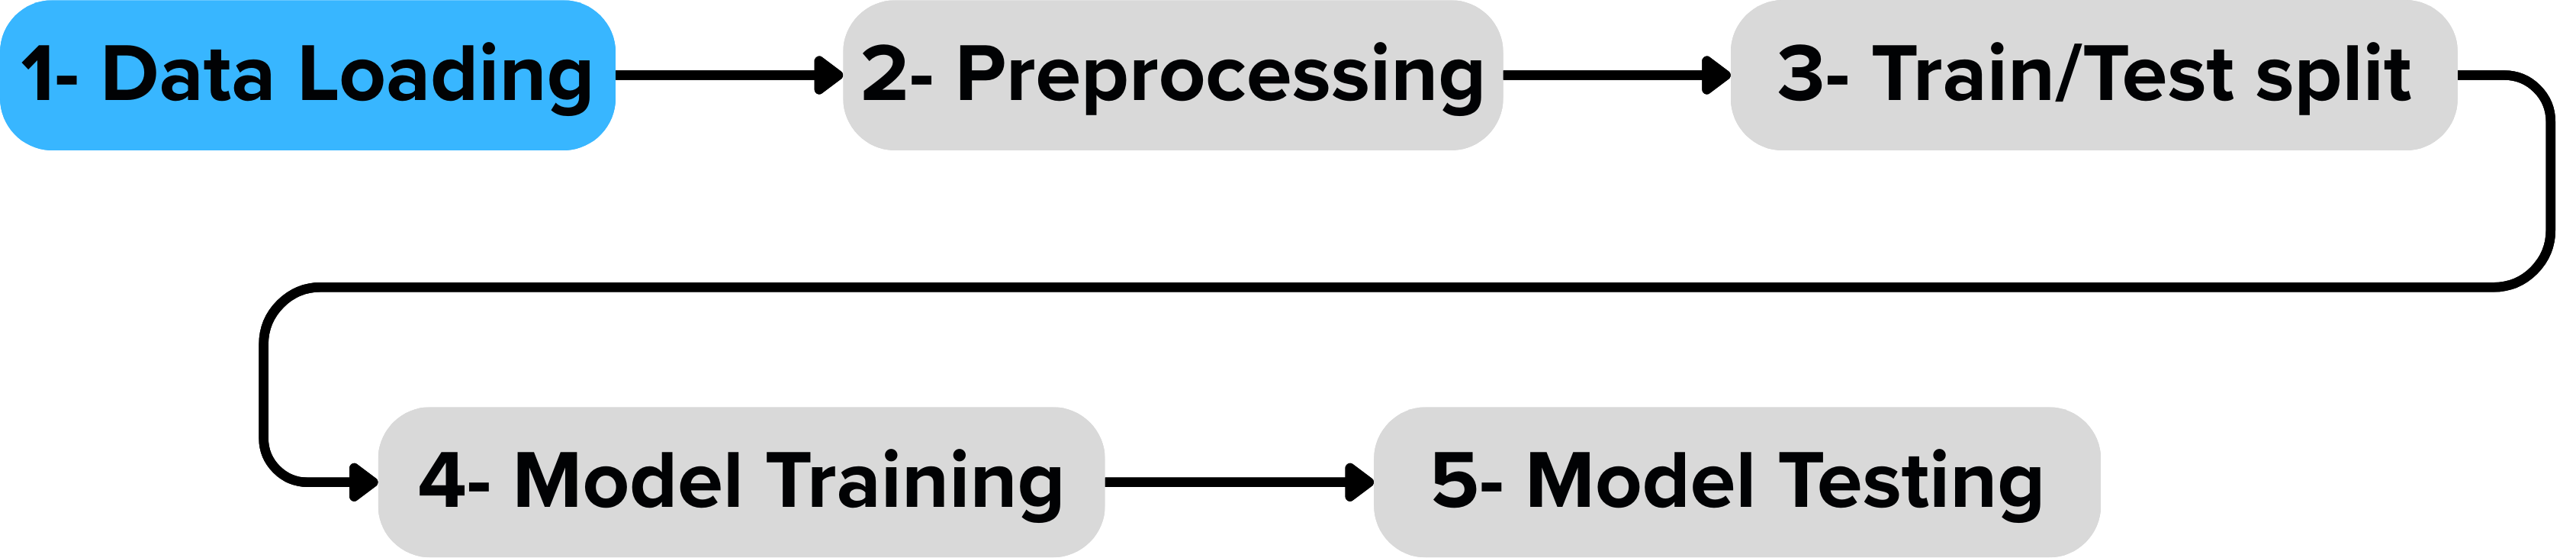

In [13]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

## Loading data in different ways
### Option 1: Load local CSV

In [14]:
# Load Dataset

df = pd.read_csv("Chocolate_Sales.csv")

# Display first 5 rows
df.head(7)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184
5,Van Tuxwell,India,Smooth Sliky Salty,06/06/2022,"$5,376.00",38
6,Oby Sorrel,UK,99% Dark & Pure,25/01/2022,"$13,685.00",176


The dataset consists of individual chocolate sales records, where each row represents a single sales transaction.
The columns describe attributes such as the sales date, product information, sales location, and sales amount.
From the first few rows, we can observe that some columns contain textual data, while others contain numerical values stored as text, such as currency values. This indicates that data type verification is necessary before further analysis.

### Option 2: Load online dataset using tensorflow.keras.datasets

In [15]:
from tensorflow.keras import datasets
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


This example demonstrates how datasets can be loaded directly from online sources using built-in libraries. The CIFAR-10 dataset is downloaded automatically and provided in predefined training and testing sets. This approach is commonly used in supervised learning experiments, especially for image-based datasets, as it simplifies data access and preparation.

### Option 3: Kaggle-style path reading

In [17]:
# train_df = pd.read_csv("/kaggle/input/rsna-breast-cancer-detection/train.csv")
# test_df  = pd.read_csv("/kaggle/input/rsna-breast-cancer-detection/test.csv")

# train_df.head()

### Data type of columns

In [18]:
# viewing the data types of columns
df.dtypes

Sales Person     object
Country          object
Product          object
Date             object
Amount           object
Boxes Shipped     int64
dtype: object

The data type inspection shows that several columns are stored as object types, including date and monetary values. While categorical features are expected to be objects, date and numerical values stored as objects indicate formatting issues. Identifying such inconsistencies is important before proceeding with deeper analysis.

In [20]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True)
df['Amount'] = pd.to_numeric(df['Amount'])

df.dtypes

Sales Person             object
Country                  object
Product                  object
Date             datetime64[ns]
Amount                  float64
Boxes Shipped             int64
dtype: object

The date column has been converted to a datetime format, and the revenue column has been cleaned and converted to a numerical data type. This ensures that time-based analysis and numerical calculations can be performed correctly. Correcting data types at this stage improves the reliability of subsequent analysis.

### Check Missing Values

In [21]:
print(df.isna().sum())

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64


The missing values analysis shows whether any features contain null or undefined values.
If missing values are present, they can affect summary statistics and machine learning models.
In this dataset, the presence or absence of missing values helps determine whether data cleaning steps, such as imputation or row removal, will be required in later preprocessing stages.

### Check duplicate rows

In [22]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

Series([], dtype: bool)

The duplicate records check identifies whether the same sales transaction appears more than once in the dataset.
Duplicate entries can bias the analysis by overrepresenting certain transactions or categories.
If duplicates exist, they should be investigated to determine whether they represent valid repeated transactions or data entry errors.

### No. of rows and columns

In [23]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (3282, 6) 

number of rows:  3282
number of columns:  6


The dataset consists of 3,282 rows and 6 columns. This size is suitable for exploratory analysis and allows meaningful insights without being computationally expensive. Knowing the dataset dimensions helps in selecting appropriate analysis and visualization techniques.

### Descriptive summary Statistics

In [24]:
# Statistical summary
df.describe(include='all')

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
count,3282,3282,3282,3282,3282.000000,3282.000000
unique,25,6,22,NaN,NaN,NaN
top,Kelci Walkden,Australia,Eclairs,NaN,NaN,NaN
freq,162,615,180,NaN,NaN,NaN
mean,NaN,NaN,NaN,2023-05-03 15:09:06.252284928,6030.338775,164.666971
min,NaN,NaN,NaN,2022-01-03 00:00:00,7.000000,1.000000
25%,NaN,NaN,NaN,2022-07-04 00:00:00,2521.495000,71.000000
50%,NaN,NaN,NaN,2023-05-11 00:00:00,5225.500000,137.000000
75%,NaN,NaN,NaN,2024-03-02 00:00:00,8556.842500,232.000000
max,NaN,NaN,NaN,2024-08-31 00:00:00,26170.950000,778.000000


The descriptive statistics provide an overview of both numerical and categorical features. Numerical summaries reveal the central tendency, spread, and range of values, while categorical summaries show the number of unique categories and their frequencies. This confirms that the dataset contains a limited number of numerical features and several categorical features, making it descriptive in nature.

### Univariate Analysis

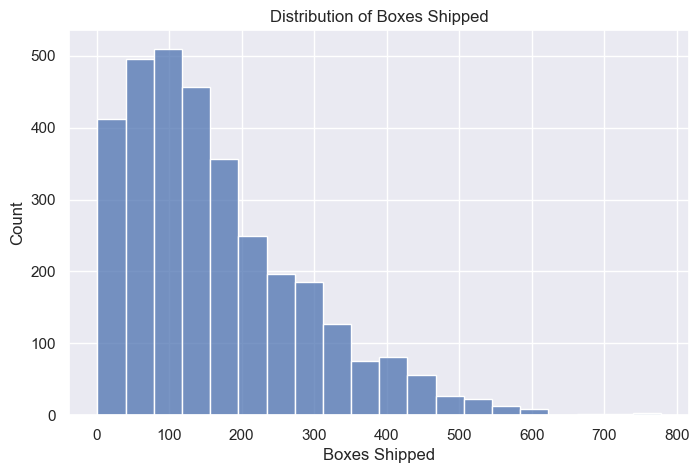

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(df['Boxes Shipped'], bins=20)
plt.title("Distribution of Boxes Shipped")
plt.show()

- Shows how shipment sizes are distributed
- Right skew = many small shipments, few large ones

The distribution of boxes shipped is right-skewed, indicating that most transactions involve a relatively small number of boxes, while a few transactions involve much larger shipments. Such skewness is common in sales data and may influence later modeling decisions.

### Distribution of Revenue

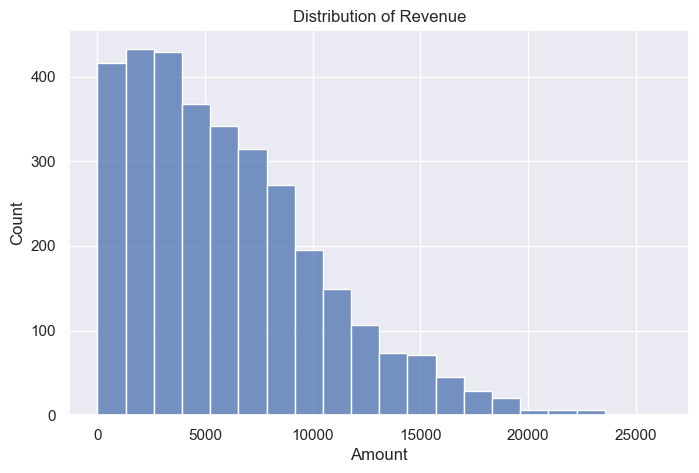

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(df['Amount'], bins=20)
plt.title("Distribution of Revenue")
plt.show()

The revenue distribution is also right-skewed, with most transactions generating moderate revenue and fewer transactions generating very high revenue. This suggests the presence of high-value sales that may act as outliers or important contributors to total revenue.

## Bivariate Analysis

### Revenue by Country

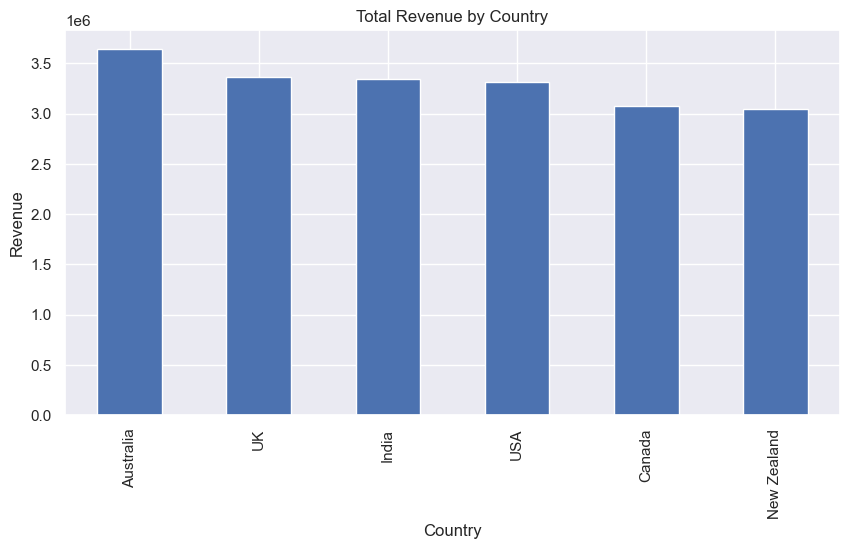

Country
Australia      3646444.35
UK             3365388.90
India          3343730.83
USA            3313858.09
Canada         3078495.65
New Zealand    3043654.04
Name: Amount, dtype: float64

In [27]:
country_revenue = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
country_revenue.plot(kind='bar')
plt.title("Total Revenue by Country")
plt.ylabel("Revenue")
plt.show()

country_revenue

The total revenue varies across countries, with some countries contributing significantly more to overall sales than others. This indicates geographical differences in sales performance and suggests that country is an important categorical feature in the dataset.

### Revenue by Product

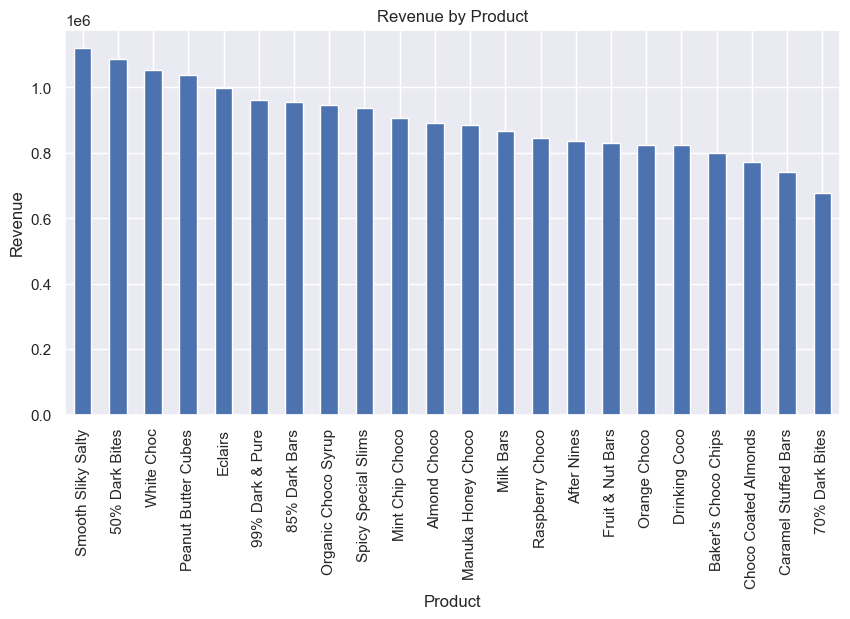

Product
Smooth Sliky Salty      1120201.09
50% Dark Bites          1087659.35
White Choc              1054257.00
Peanut Butter Cubes     1036591.09
Eclairs                  996947.96
99% Dark & Pure          960033.45
85% Dark Bars            955268.24
Organic Choco Syrup      945345.73
Spicy Special Slims      938131.69
Mint Chip Choco          904989.55
Almond Choco             890454.65
Manuka Honey Choco       885208.03
Milk Bars                866273.62
Raspberry Choco          845388.41
After Nines              837215.67
Fruit & Nut Bars         829278.96
Orange Choco             824070.85
Drinking Coco            822245.57
Baker's Choco Chips      799085.67
Choco Coated Almonds     773062.91
Caramel Stuffed Bars     742516.15
70% Dark Bites           677346.22
Name: Amount, dtype: float64

In [28]:
product_revenue = df.groupby('Product')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
product_revenue.plot(kind='bar')
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.show()

product_revenue

The revenue distribution across products shows that certain chocolate products generate higher total revenue than others. This highlights product-level performance differences and suggests that product type plays a significant role in revenue generation.

### Revenue by Sales Person

In [29]:
salesperson_revenue = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False)

salesperson_revenue.head(10)

Sales Person
Ches Bonnell           1022599.96
Oby Sorrel             1017204.12
Madelene Upcott        1010028.72
Kelci Walkden          1002929.10
Brien Boise             997326.48
Van Tuxwell             974425.09
Dennison Crosswaite     931849.57
Beverie Moffet          892421.37
Kaine Padly             849062.76
Marney O'Breen          836427.63
Name: Amount, dtype: float64

The revenue contribution varies among salespersons, with a few individuals generating higher total revenue. This may reflect differences in sales regions, experience, or customer base, and indicates that the sales person feature may influence sales outcomes.

### Boxes vs Revenue Relationship

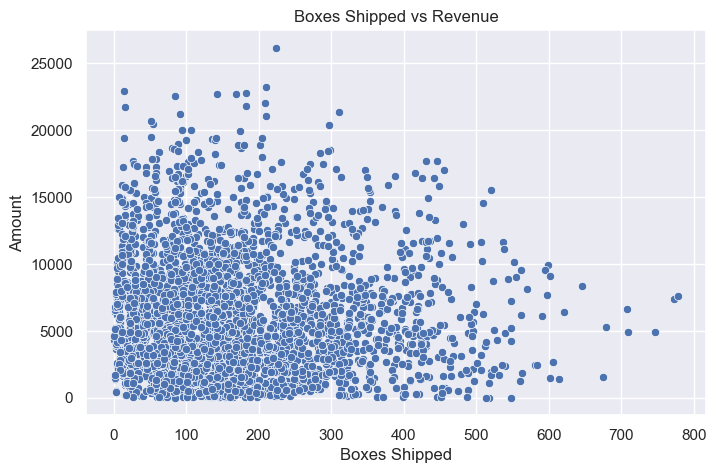

In [30]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Boxes Shipped', y='Amount', data=df)
plt.title("Boxes Shipped vs Revenue")
plt.show()

The scatter plot shows a general positive relationship between the number of boxes shipped and revenue. However, the spread of points indicates variability, suggesting that revenue is influenced by additional factors beyond shipment volume, such as product type or pricing.

### Correlation Matrix

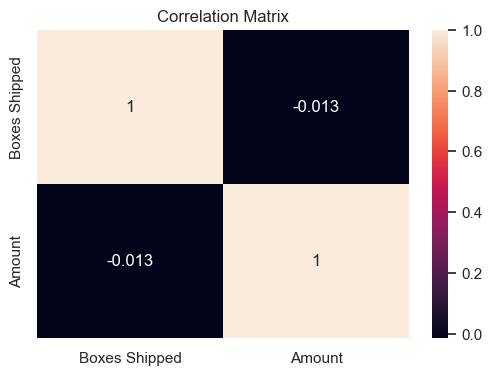

In [31]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Boxes Shipped', 'Amount']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

- Correlation close to 1 = strong positive relationship
- Close to 0 = weak relationship

The correlation matrix shows a weak positive correlation between boxes shipped and revenue. This suggests that while shipment volume contributes to revenue, it is not the sole determining factor. Other features likely play an important role in explaining revenue variation.

## Time-Based Analysis
### Monthly Revenue Trend

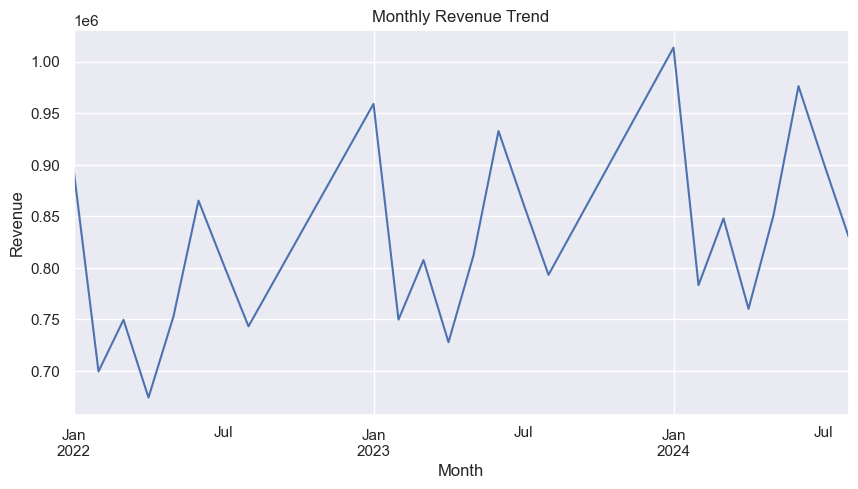

In [32]:
df['Month'] = df['Date'].dt.to_period('M')

monthly_revenue = df.groupby('Month')['Amount'].sum()

plt.figure(figsize=(10,5))
monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.show()

The monthly revenue trend shows fluctuations over time, indicating seasonal or periodic variations in sales. Identifying such trends is useful for understanding business cycles and can inform forecasting and time-series modeling in future analysis.

# Assignment

In this assignment, you will apply the EDA techniques learned in class to a dataset of your choice. You must submit the dataset file with your notebook.


End of lab 3.

In [63]:
# the important libraries for cvs file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

df = pd.read_csv("Superstore.csv", encoding="latin1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [64]:
# Check column type
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [65]:
# fix dates and numbers
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')


df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

In [66]:
# Check missing values

df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [67]:
# Show number of rows and columns

df[df.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [68]:
# Show number of rows and columns

print("Shape:", df.shape)
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Shape: (9994, 21)
Rows: 9994
Columns: 21


In [69]:
# Summary statistics
df.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,NaN,NaN,4,793,793,3,1,531,...,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,NaN,NaN,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,NaN,NaN,5968,37,37,5191,9994,915,...,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,NaN,NaN,NaN,NaN,NaN,NaN,...,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
min,1.000000,NaN,2014-01-03 00:00:00,2014-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,2015-05-23 00:00:00,2015-05-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,2016-06-26 00:00:00,2016-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,56430.500000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,2017-05-14 00:00:00,2017-05-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000
max,9994.000000,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,99301.000000,NaN,NaN,NaN,NaN,NaN,22638.480000,14.000000,0.800000,8399.976000


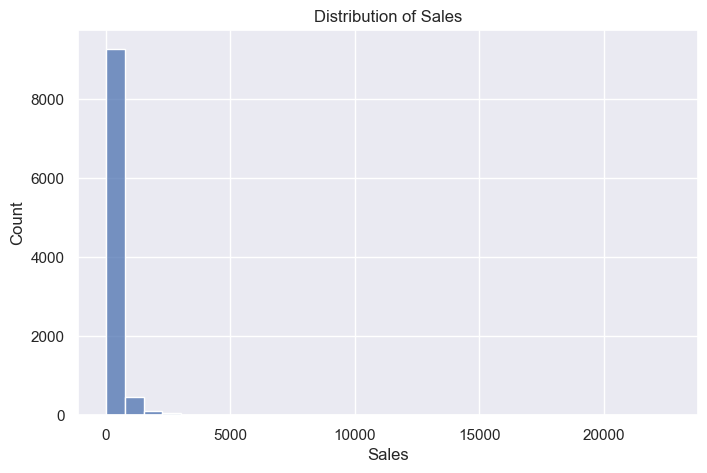

In [70]:
# Sales distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], bins=30)
plt.title("Distribution of Sales")
plt.show()

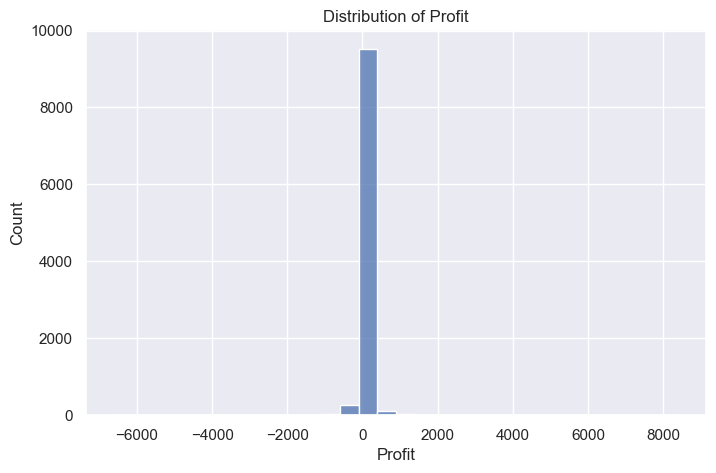

In [71]:
# Profit distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Profit'], bins=30)
plt.title("Distribution of Profit")
plt.show()

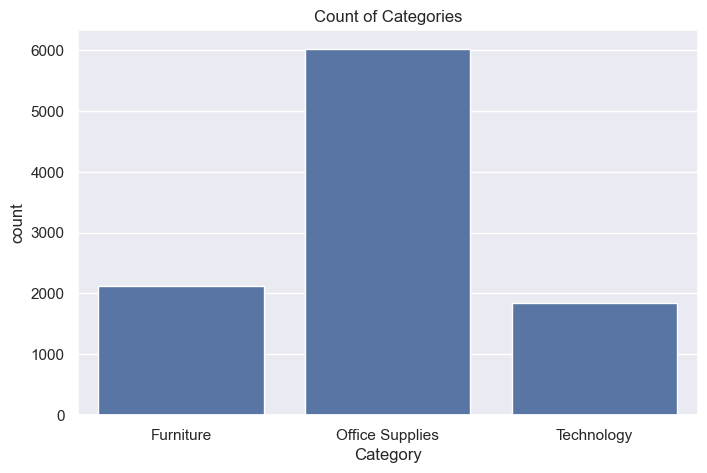

In [72]:
# Category count
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Category')
plt.title("Count of Categories")
plt.show()

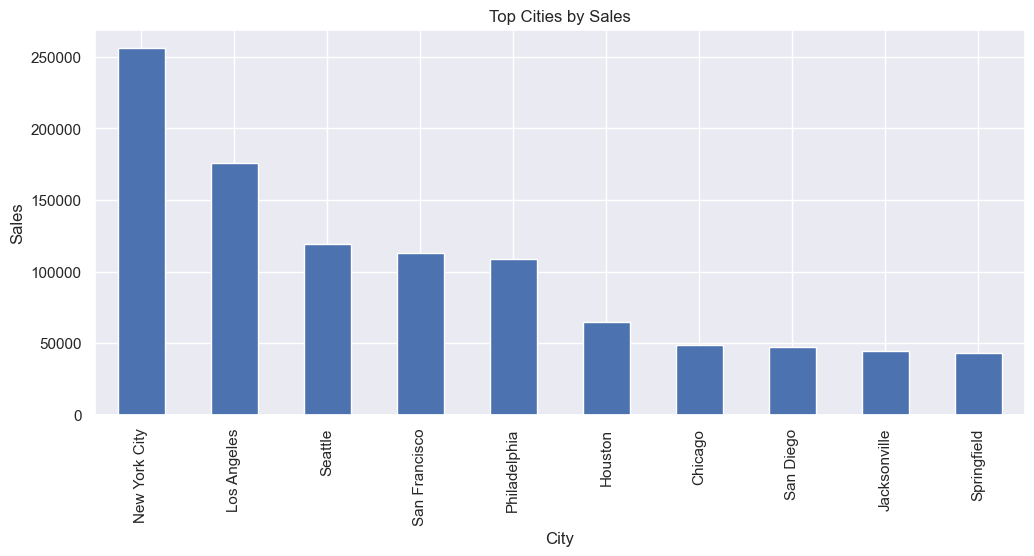

In [73]:
# Sales by city
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,5))
city_sales.head(10).plot(kind='bar')
plt.title("Top Cities by Sales")
plt.ylabel("Sales")
plt.show()

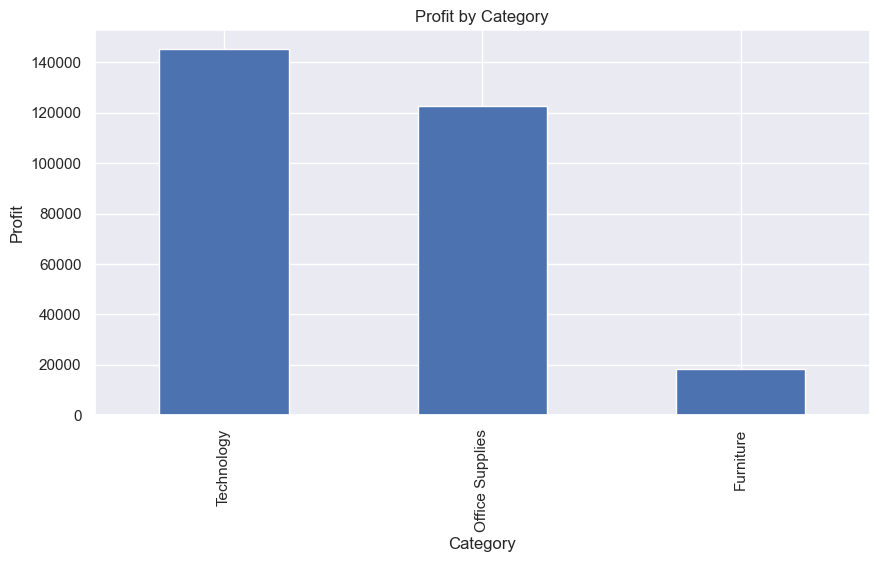

In [74]:
# Profit by category
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
category_profit.plot(kind='bar')
plt.title("Profit by Category")
plt.ylabel("Profit")
plt.show()

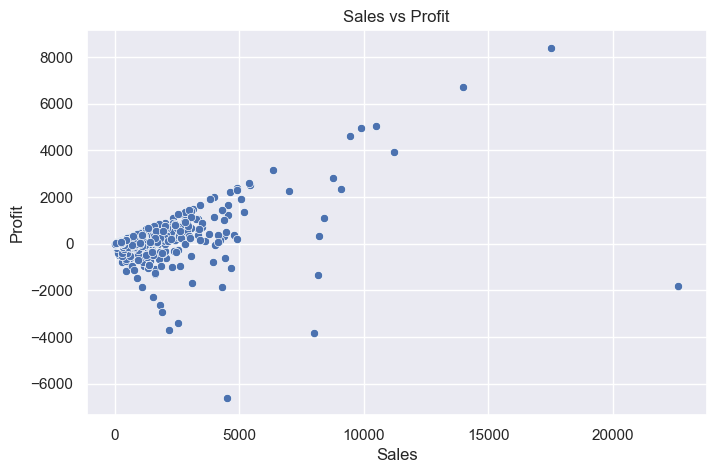

In [75]:
# Sales vs Profit
plt.figure(figsize=(8,5))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title("Sales vs Profit")
plt.show()

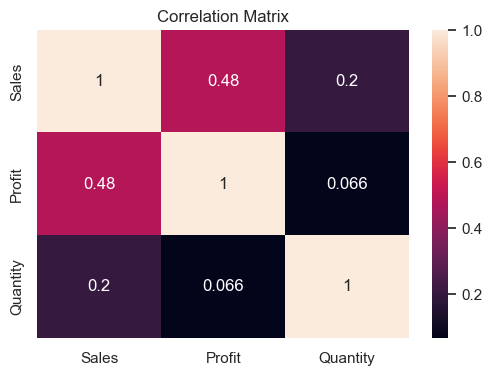

In [76]:
# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[['Sales','Profit','Quantity']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

In [77]:
# Create month column
df['Month'] = df['Order Date'].dt.to_period('M')

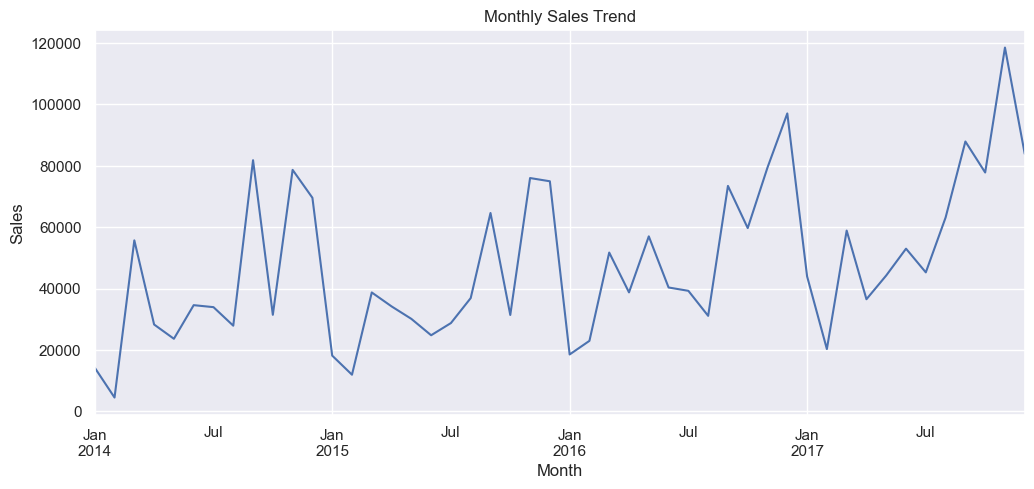

In [78]:
# Monthly sales trend
monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(12,5))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.show()